In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from joblib import dump
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

import warnings

In [2]:
df = pd.read_csv("dataset.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [14]:
file_path = 'dataset.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Convert categorical features to numerical using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Define features and target variable
# Assuming 'survived' is the name of the column you want to predict (replace with actual column name)
X = data.drop('Target', axis=1)  # Features
y = data['Target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Accuracy: 0.7613

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       441
           1       0.53      0.29      0.37       245
           2       0.78      0.92      0.84       642

    accuracy                           0.76      1328
   macro avg       0.70      0.67      0.67      1328
weighted avg       0.74      0.76      0.74      1328

Cross-Validation Scores: [0.78079096 0.76384181 0.78644068 0.76723164 0.74434389]
Mean Accuracy: 0.7685
Standard Deviation: 0.0147


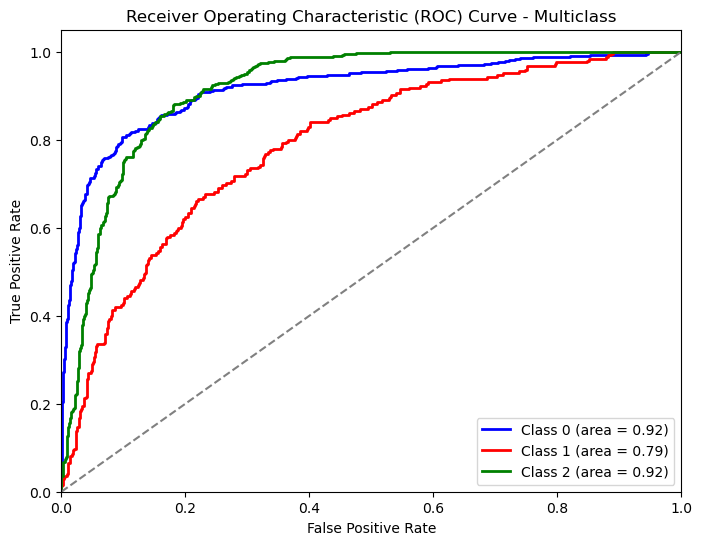

In [16]:
# # Initialize the Logistic Regression model
# model = LogisticRegression(max_iter=1000)

# # Train the model
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)
# y_pred_prob = model.predict_proba(X_test)[:, 1]

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"\nAccuracy: {accuracy:.4f}")

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Print the cross-validation results
# print(f"Cross-Validation Scores: {cv_scores}")
# print(f"Mean Accuracy: {cv_scores.mean():.4f}")
# print(f"Standard Deviation: {cv_scores.std():.4f}")

# # ROC Curve Visualization
# fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are already defined from your previous steps
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Step 4: Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Binarize the output for ROC curve computation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()


In [ ]:
df.head()
df.info()
df.describe()

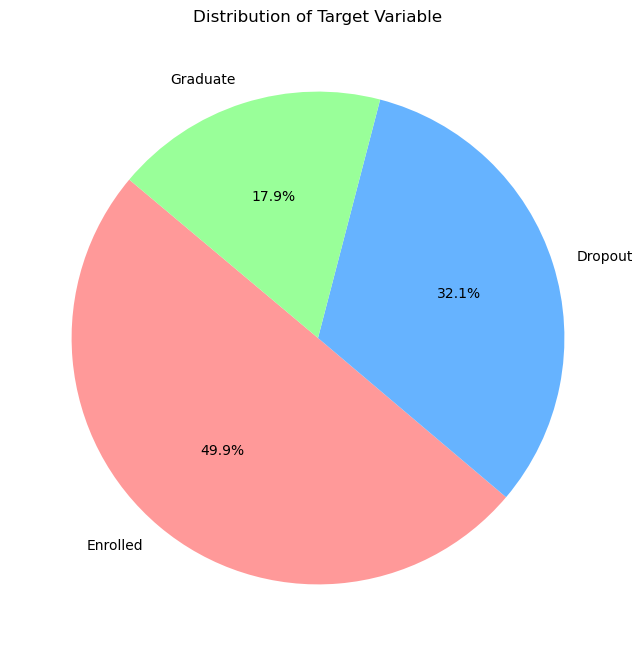

In [5]:
target_labels = {0: 'Dropout', 1: 'Graduate', 2: 'Enrolled'}
data['Target'] = data['Target'].map(target_labels)

# Calculate the distribution of the target variable
target_counts = data['Target'].value_counts()

# Create a pie chart with categorical labels
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Target Variable')
plt.show()

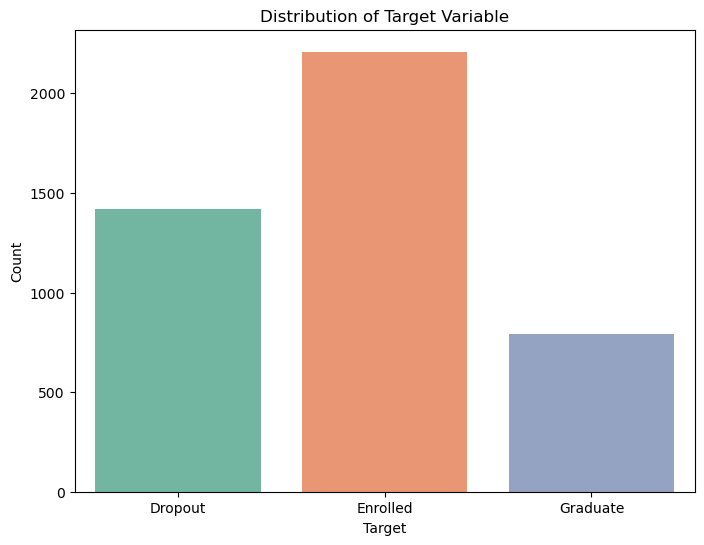

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=data, palette='Set2')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

Top features correlated with Dropout:
Dropout                                           1.000000
Age at enrollment                                 0.254215
Debtor                                            0.229407
Gender                                            0.203983
Application mode                                  0.188908
Marital status                                    0.093712
Previous qualification                            0.091590
Curricular units 2nd sem (without evaluations)    0.079901
Mother's qualification                            0.059499
Curricular units 1st sem (without evaluations)    0.054230
Inflation rate                                    0.027826
Father's qualification                            0.016267
Unemployment rate                                 0.012980
Educational special needs                         0.002806
Course                                           -0.000083
Nacionality                                      -0.001571
International     

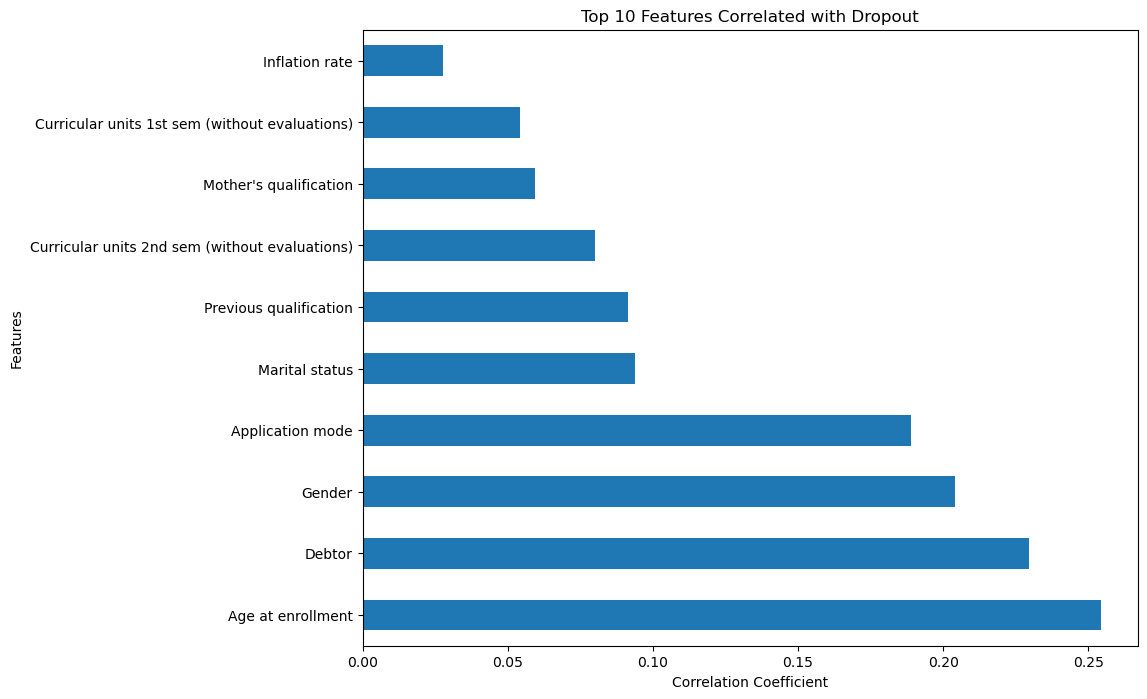

In [7]:
# Map the 'Target' variable to identify dropouts specifically
data['Dropout'] = data['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# # Calculate the correlation matrix, focusing on the 'Dropout' column
# correlation_with_dropout = data.corr(numeric_only=True)['Dropout'].sort_values(ascending=False)
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation with the 'Dropout' column
correlation_with_dropout = numeric_data.corr()['Dropout'].sort_values(ascending=False)


# Display the top correlations with 'Dropout'
print("Top features correlated with Dropout:")
print(correlation_with_dropout)

# Optionally, you can visualize the top features (e.g., top 10 or 20) if needed:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
correlation_with_dropout.drop('Dropout').head(10).plot(kind='barh')
plt.title('Top 10 Features Correlated with Dropout')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

Cross-Validation Scores: [0.77062147 0.78305085 0.78757062 0.77288136 0.76357466]
Mean Accuracy from Cross-Validation: 0.775539790883759
Standard Deviation from Cross-Validation: 0.008666929843921353

Confusion Matrix:
[[ 83  61 101]
 [ 29 349  63]
 [ 30  19 593]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.34      0.43       245
           1       0.81      0.79      0.80       441
           2       0.78      0.92      0.85       642

    accuracy                           0.77      1328
   macro avg       0.73      0.68      0.69      1328
weighted avg       0.76      0.77      0.76      1328


Accuracy Score:
0.7718373493975904


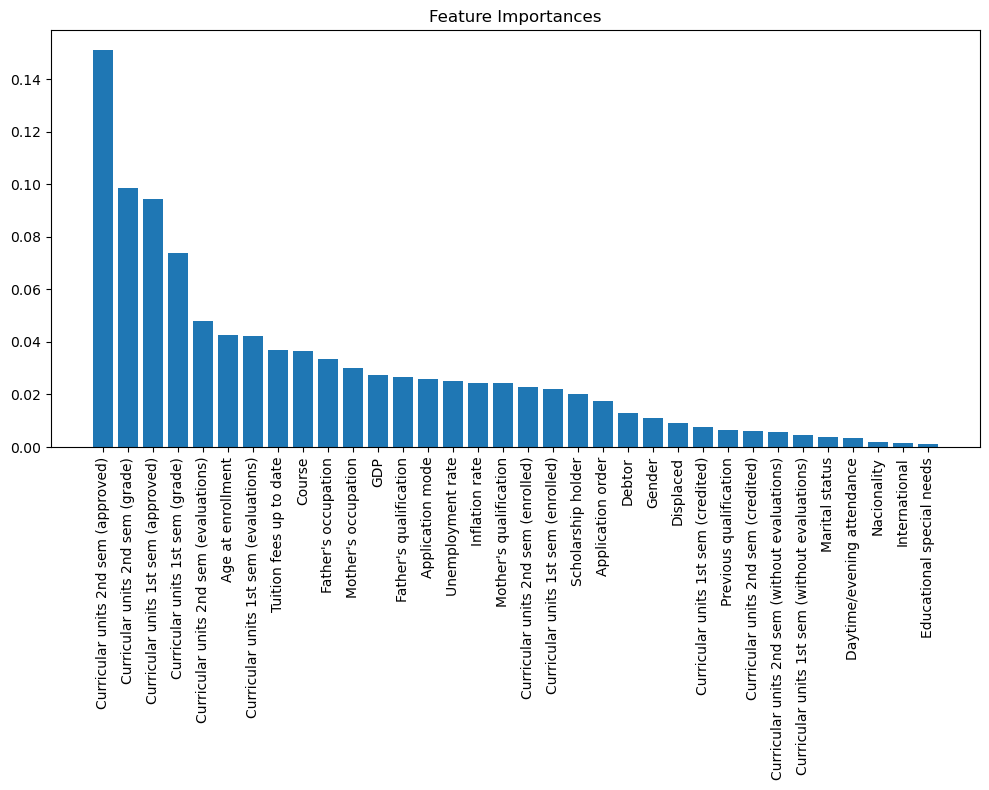

In [8]:
target_mapping = {'Dropout': 1, 'Graduate': 0, 'Enrolled': 2}
data['Target_Num'] = data['Target'].map(target_mapping)

# Define the feature set (X) and the target (y)
X = data.drop(columns=['Target', 'Target_Num', 'Dropout'])  # Drop non-numeric target columns
y = data['Target_Num']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Cross-Validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Output Cross-Validation Results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy from Cross-Validation:", cv_scores.mean())
print("Standard Deviation from Cross-Validation:", cv_scores.std())

# Step 5: Train the model
rf_model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Optional: Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [9]:
# Step 1: Prepare the data
# Assuming 'data_updated' is your DataFrame and 'Target' is the target variable
# Map the target variable to numerical labels if not already done
target_mapping = {'Dropout': 1, 'Graduate': 0, 'Enrolled': 2}
data['Target_Num'] = data['Target'].map(target_mapping)

# Define the feature set (X) and the target (y)
X = data.drop(columns=['Target', 'Target_Num', 'Dropout'])  # Drop non-numeric target columns
y = data['Target_Num']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the Gaussian Naive Bayes Classifier
gnb_model = GaussianNB()

# Step 4: Cross-Validation (Optional)
cv_scores = cross_val_score(gnb_model, X, y, cv=5, scoring='accuracy')

# Output Cross-Validation Results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy from Cross-Validation:", cv_scores.mean())
print("Standard Deviation from Cross-Validation:", cv_scores.std())

# Step 5: Train the model
gnb_model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = gnb_model.predict(X_test)

# Step 7: Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Cross-Validation Scores: [0.69830508 0.68135593 0.6960452  0.6779661  0.68778281]
Mean Accuracy from Cross-Validation: 0.6882910243628091
Standard Deviation from Cross-Validation: 0.007941869149767699

Confusion Matrix:
[[ 79  44 122]
 [ 54 313  74]
 [ 57  38 547]]

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.32      0.36       245
           1       0.79      0.71      0.75       441
           2       0.74      0.85      0.79       642

    accuracy                           0.71      1328
   macro avg       0.65      0.63      0.63      1328
weighted avg       0.70      0.71      0.70      1328


Accuracy Score:
0.7070783132530121


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

Cross-Validation Scores: [0.67909605 0.66892655 0.68022599 0.69265537 0.66063348]
Mean Accuracy from Cross-Validation: 0.6763074877930312
Standard Deviation from Cross-Validation: 0.010867717719859718


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 


Best Parameters: {'n_neighbors': 19, 'weights': 'distance'}
Best Cross-Validation Score: 0.689277711188702

Confusion Matrix:
[[ 32  38 175]
 [ 35 254 152]
 [ 14  12 616]]

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.13      0.20       245
           1       0.84      0.58      0.68       441
           2       0.65      0.96      0.78       642

    accuracy                           0.68      1328
   macro avg       0.63      0.56      0.55      1328
weighted avg       0.67      0.68      0.64      1328


Accuracy Score:
0.6792168674698795


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

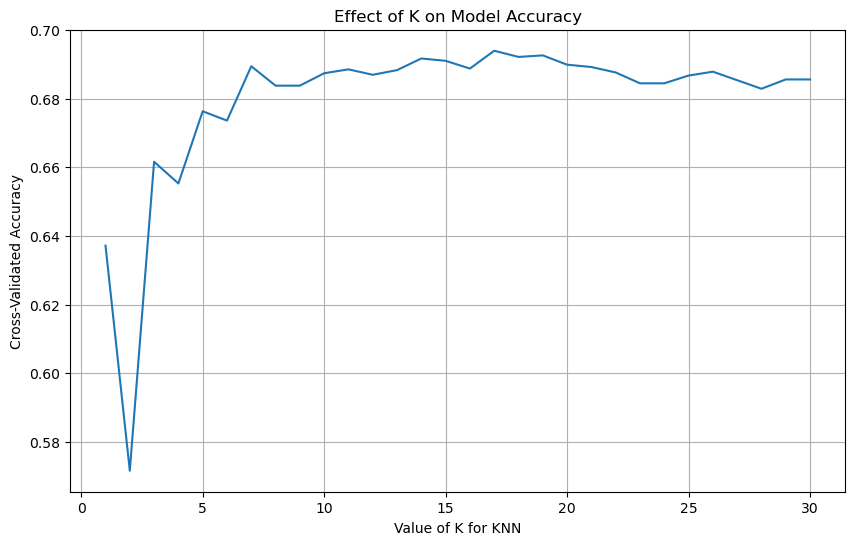

In [10]:
# Step 1: Prepare the data
# Assuming 'data_updated' is your DataFrame and 'Target' is the target variable
# Map the target variable to numerical labels if not already done
target_mapping = {'Dropout': 1, 'Graduate': 0, 'Enrolled': 2}
data['Target_Num'] = data['Target'].map(target_mapping)

# Define the feature set (X) and the target (y)
X = data.drop(columns=['Target', 'Target_Num', 'Dropout'])  # Drop non-numeric target columns
y = data['Target_Num']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the KNN Classifier
knn_model = KNeighborsClassifier()

# Step 4: Cross-Validation (Optional)
cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')

# Output Cross-Validation Results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy from Cross-Validation:", cv_scores.mean())
print("Standard Deviation from Cross-Validation:", cv_scores.std())

# Step 5: Hyperparameter Tuning with GridSearchCV (Optional)
param_grid = {'n_neighbors': np.arange(1, 31), 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Step 6: Train the model with the best parameters
best_knn_model = grid_search.best_estimator_
best_knn_model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

# Step 8: Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Optional: Visualizing the effect of different k values
k_range = np.arange(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Effect of K on Model Accuracy')
plt.grid(True)
plt.show()

Cross-Validation Scores: [0.73559322 0.74915254 0.74576271 0.73672316 0.72285068]
Mean Accuracy from Cross-Validation: 0.7380164634302222
Standard Deviation from Cross-Validation: 0.009182182479208446

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.772291416957632

Confusion Matrix:
[[ 78  58 109]
 [ 35 343  63]
 [ 36  12 594]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.32      0.40       245
           1       0.83      0.78      0.80       441
           2       0.78      0.93      0.84       642

    accuracy                           0.76      1328
   macro avg       0.71      0.67      0.68      1328
weighted avg       0.75      0.76      0.75      1328


Accuracy Score:
0.7643072289156626


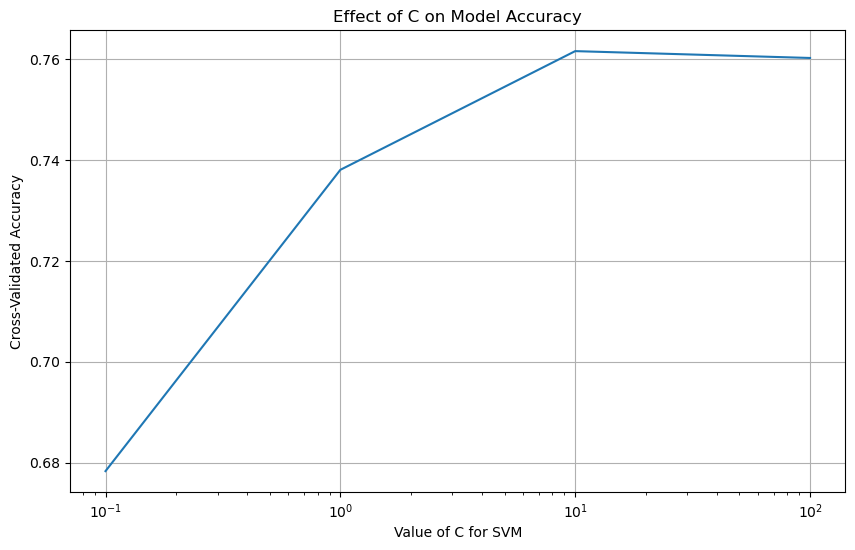

In [13]:
# Step 1: Prepare the data
# Assuming 'data_updated' is your DataFrame and 'Target' is the target variable
# Map the target variable to numerical labels if not already done
target_mapping = {'Dropout': 1, 'Graduate': 0, 'Enrolled': 2}
data['Target_Num'] = data['Target'].map(target_mapping)

# Define the feature set (X) and the target (y)
X = data.drop(columns=['Target', 'Target_Num', 'Dropout'])  # Drop non-numeric target columns
y = data['Target_Num']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the SVM Classifier
svm_model = SVC()

# Step 4: Cross-Validation (Optional)
cv_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')

# Output Cross-Validation Results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy from Cross-Validation:", cv_scores.mean())
print("Standard Deviation from Cross-Validation:", cv_scores.std())

# Step 5: Hyperparameter Tuning with GridSearchCV (Optional)
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Step 6: Train the model with the best parameters
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = best_svm_model.predict(X_test)

# Step 8: Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Optional: Visualizing the effect of different C values
C_range = [0.1, 1, 10, 100]
C_scores = []

for C in C_range:
    svm = SVC(C=C, kernel='rbf', gamma='scale')
    scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
    C_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(C_range, C_scores)
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Effect of C on Model Accuracy')
plt.xscale('log')
plt.grid(True)
plt.show()

Cross-Validation Scores: [0.76045198 0.72655367 0.76045198 0.74124294 0.72963801]
Mean Accuracy from Cross-Validation: 0.743667714804305
Standard Deviation from Cross-Validation: 0.014553525888515786


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro


Best Parameters: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Best Cross-Validation Score: 0.762921986554797

Confusion Matrix:
[[ 80  66  99]
 [ 39 346  56]
 [ 29  22 591]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.33      0.41       245
           1       0.80      0.78      0.79       441
           2       0.79      0.92      0.85       642

    accuracy                           0.77      1328
   macro avg       0.71      0.68      0.68      1328
weighted avg       0.75      0.77      0.75      1328


Accuracy Score:
0.7658132530120482


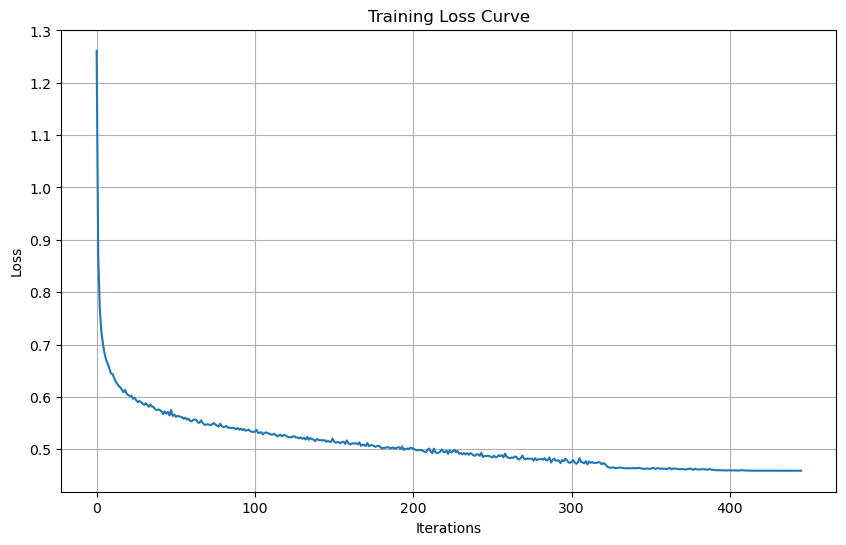

In [12]:
# Step 1: Prepare the data
# Assuming 'data_updated' is your DataFrame and 'Target' is the target variable
# Map the target variable to numerical labels if not already done
target_mapping = {'Dropout': 1, 'Graduate': 0, 'Enrolled': 2}
data['Target_Num'] = data['Target'].map(target_mapping)

# Define the feature set (X) and the target (y)
X = data.drop(columns=['Target', 'Target_Num', 'Dropout'])  # Drop non-numeric target columns
y = data['Target_Num']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the Neural Network (MLPClassifier)
mlp_model = MLPClassifier(random_state=42, max_iter=500)

# Step 4: Cross-Validation (Optional)
cv_scores = cross_val_score(mlp_model, X, y, cv=5, scoring='accuracy')

# Output Cross-Validation Results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy from Cross-Validation:", cv_scores.mean())
print("Standard Deviation from Cross-Validation:", cv_scores.std())

# Step 5: Hyperparameter Tuning with GridSearchCV (Optional)
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Step 6: Train the model with the best parameters
best_mlp_model = grid_search.best_estimator_
best_mlp_model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = best_mlp_model.predict(X_test)

# Step 8: Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Optional: Visualizing Loss Curve (Training Process)
plt.figure(figsize=(10, 6))
plt.plot(best_mlp_model.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

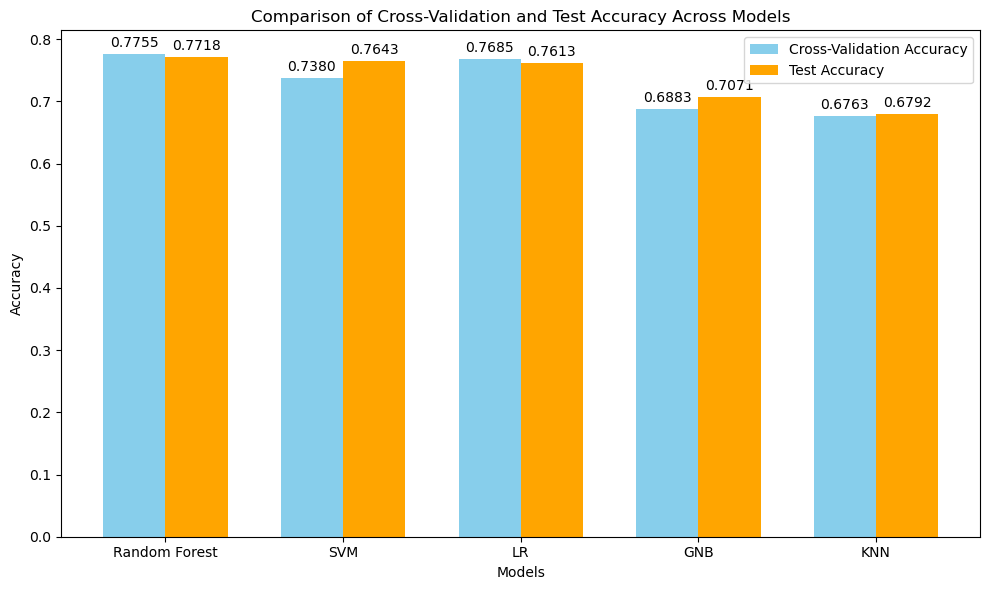

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest', 'SVM', 'LR', 'GNB', 'KNN']
cv_accuracies = [0.77553, 0.73801, 0.7685, 0.68829, 0.67630]
test_accuracies = [0.77183, 0.76430, 0.7613, 0.70707, 0.67921]

# Position of bars on the x-axis
x = np.arange(len(models))

# Width of the bars
width = 0.35

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, cv_accuracies, width, label='Cross-Validation Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='orange')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Cross-Validation and Test Accuracy Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding the accuracy values on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Display the plot
plt.tight_layout()
plt.show()
